In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ase import Atoms
from ase.build import mx2
from ase.visualize import view
from ase.io import write
from ase.io.trajectory import Trajectory

from asap3 import FullNeighborList

from tqdm import tqdm

from vibrational_amplitudes import *

# Extract Amplitudes

In [3]:
MD_traj = Trajectory('trajectory_data/md-hot.traj','r')
n_steps = len(MD_traj)

In [4]:
# I will take the last half of the MD simulation in order to only include the thermal vibrations 
# after thermalisation
start = int(n_steps*0.5)
thermalised_traj = MD_traj[-start:]

trajectory = [ thermalised_traj ]

# sigma_xyz = [1.0, 0.05, 1.0]
# mu_xyz = [0.0, 0.0, 0.0]
sigma_xyz, mu_xyz = get_edge_vibrations(trajectories=trajectory,
                                        element=16,
                                        rcut=3.2,
                                        nb_element=42,
                                        max_nb=1)

In [5]:
MD_traj.close()

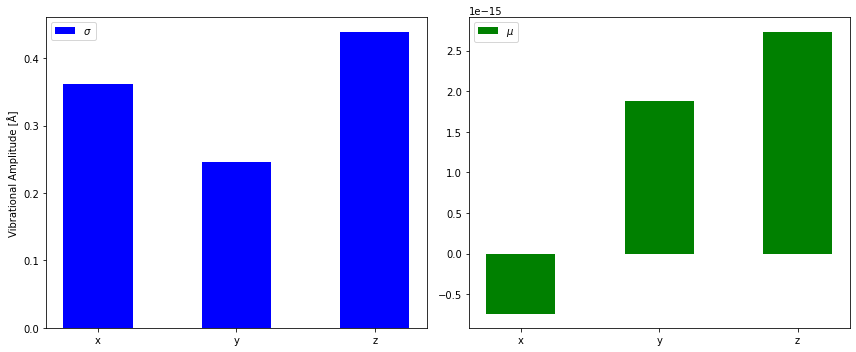

In [8]:
X = np.arange(3)
fig, axs = plt.subplots(1,2,figsize =(12, 5))
axs[0].bar(X, sigma_xyz, color = 'b', width = 0.5, label='$\sigma$')
axs[0].set_xticks(X)
axs[0].set_xticklabels(['x', 'y', 'z'])
axs[0].set_ylabel('Vibrational Amplitude [Å]')
axs[0].legend()
axs[1].bar(X, mu_xyz, color = 'g', width = 0.5, label='$\mu$')
axs[1].set_xticks(X)
axs[1].set_xticklabels(['x', 'y', 'z'])
axs[1].legend()

plt.tight_layout()
plt.show()

In [9]:
100*(sigma_xyz[0] - sigma_xyz[1]) / sigma_xyz[1]

46.37041987785177

# Apply Perturbations

In [6]:
iatoms = Trajectory('trajectory_data/initial.traj')[0]

In [7]:
fatoms = perturb_edge_atoms(atoms=iatoms,
                            sigma=sigma_xyz,
                            mu=mu_xyz,
                            element=16,
                            rcut=3.2,
                            nb_element=42,
                            max_nb=1,
                            seed=None)

In [8]:
view(iatoms)
view(fatoms)

In [9]:
iatoms.write('trajectory_data/fp-hot-edges.traj')          # write initial configuraiton
t1 = Trajectory('trajectory_data/fp-hot-edges.traj', 'a') # open in append mode
for i in tqdm(np.arange(1,2500)):
    patoms = perturb_edge_atoms(atoms=iatoms,
                            sigma=sigma_xyz,
                            mu=mu_xyz,
                            element=16,
                            rcut=3.2,
                            nb_element=42,
                            max_nb=1,
                            seed=None)
    t1.write(patoms)
t1.close()

100%|██████████| 2499/2499 [00:05<00:00, 463.69it/s]
